In [1]:
from astropy.table import Table

In [27]:
import numpy as np
import pandas as pd

In [3]:
import uncertainties as un
from uncertainties import unumpy

In [4]:
from pathlib import Path

In [5]:
datapath = Path.cwd().parent / "data" / "kinematics"

In [6]:
df = pd.read_csv(datapath / "zavala-clump-velocities.tsv", delimiter="\t")

In [7]:
df.describe()

,x,y,V,PA,R_proj
count,32.000000,32.00000,12.000000,32.000000,32.000000
mean,-1.996875,-3.81250,24.000000,141.593750,18.318750
std,13.179419,14.64513,21.800751,95.119911,7.795261
min,-26.800000,-32.00000,-20.000000,0.000000,3.000000
25%,-11.300000,-14.25000,23.250000,62.250000,12.750000
50%,-2.550000,-2.00000,32.500000,149.000000,17.500000
75%,9.400000,6.50000,35.250000,211.250000,24.675000
max,23.800000,25.00000,45.000000,339.000000,33.900000


## Convert columns to ufloat to propagate uncertainties

First we have to make sure all the nan values are strings, otherwise the conversion will not work><

In [8]:
df = df.fillna("nan +/- nan")

In [9]:
df.loc[4, "R_s (const)"]

'nan +/- nan'

Select the columns that have uncertainties values

In [10]:
ucols = [_ for _ in df.columns if _.endswith(')')]
ucols

['R_s (const)', 'R_s (hubb)', 'inc (const)', 'inc (hubb)', 'V_los (hubb)']

Apply the `ufloat_fromstr` function to all these to get uncertainties objects

In [11]:
for col in ucols[:2]:
    df.loc[:, col] = df[col].apply(un.ufloat_fromstr)
df

,Slit,x,y,V,PA,R_proj,Group,R_s (const),R_s (hubb),inc (const),inc (hubb),V_los (hubb)
0,D,-26.8,0,32.0,90.0,26.8,E-27,36+/-4,31.0+/-2.0,42. +/- 7.,30. +/- 6.,36. +/- 9.
1,D,-26.8,-19,34.0,125.0,32.9,SE-30,40+/-5,37.0+/-2.0,35. +/- 10.,27. +/- 6.,39. +/- 10.
2,E,-18.0,8,26.0,66.0,19.7,NE-20,29.0+/-2.0,22.0+/-2.0,47. +/- 4.,26. +/- 10.,23. +/- 10.
3,E,-18.0,1,33.0,87.0,18.0,E-20,25+/-5,24.0+/-2.0,44. +/- 12.,41. +/- 5.,37. +/- 7.
4,E,-18.0,-22,40.0,141.0,28.4,SE-30,nan+/-nan,34.0+/-2.0,nan +/- nan,33. +/- 5.,43. +/- 8.
5,F,-11.3,14,32.0,39.0,18.0,NE-13,25+/-5,22.0+/-2.0,44. +/- 12.,35. +/- 7.,29. +/- 8.
6,F,-11.3,9,35.0,51.0,14.4,E-13,20+/-5,21.0+/-2.0,44. +/- 15.,47. +/- 5.,35. +/- 6.
7,F,-11.3,2,36.0,80.0,11.5,E-13,20+/-7,21.0+/-3.0,55. +/- 14.,57. +/- 5.,40. +/- 8.
8,F,-11.3,-4,-20.0,109.0,12.0,ESE-13,14.0+/-3.0,16.0+/-1.0,31. +/- 20.,41. +/- 4.,24. +/- 3.
9,F,-11.3,-8,45.0,125.0,13.8,SE-13,35+/-10,25.0+/-2.0,67. +/- 7.,56. +/- 3.,48. +/- 6.


We can split up the nominal value and the uncertainty like this

In [12]:
unumpy.nominal_values(df["R_s (hubb)"])

array([31., 37., 22., 24., 34., 22., 21., 21., 16., 25., 35., 25., 23.,
       20., 20., 27., 20., 18., 17., 17., 18., 27., 28., 23., 22., 21.,
       21., 29., 24., 28., 28., 29.])

In [13]:
unumpy.std_devs(df["R_s (hubb)"])

array([2., 2., 2., 2., 2., 2., 2., 3., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 4., 2., 2., 2., 2., 3., 3., 3., 2., 2., 4., 2., 2., 2.])

Note that `unumpy.nominal_values` is different from `un.nominal_value` (plural versus singular), which works on scalar values, so needs to be broadcast by hand:

In [14]:
df["R_s (hubb)"].apply(un.nominal_value).head()

0    31.0
1    37.0
2    22.0
3    24.0
4    34.0
Name: R_s (hubb), dtype: float64

## Recalculate the derived columns

The measured columns are the `R_s` ones, while the others are derived in a table in my org file. So, we will check on these by recalculating them here. In theory, `Emacs calc` and `uncertainties` should give the same answer 

In [15]:
df.loc[:, "inc (hubb)"] = unumpy.degrees(unumpy.arccos(df["R_proj"] / df["R_s (hubb)"]))
df.loc[:, "inc (const)"] = unumpy.degrees(unumpy.arccos(df["R_proj"] / df["R_s (const)"]))
df.loc[:, "V_los (hubb)"] = 46 * unumpy.sqrt(df["R_s (hubb)"]**2 - df["R_proj"]**2) / 20
df.loc[:, "V_los (const)"] = 46 * unumpy.sqrt(df["R_s (const)"]**2 - df["R_proj"]**2) / df["R_s (const)"]

In [16]:
blue_mask = df["V"].astype(str).str.startswith("-")

df.loc[blue_mask, "inc (hubb)"] *= -1
df.loc[blue_mask, "inc (const)"] *= -1

In [17]:
df

,Slit,x,y,V,PA,R_proj,Group,R_s (const),R_s (hubb),inc (const),inc (hubb),V_los (hubb),V_los (const)
0,D,-26.8,0,32.0,90.0,26.8,E-27,36+/-4,31.0+/-2.0,42+/-7,30+/-6,36+/-9,31+/-4
1,D,-26.8,-19,34.0,125.0,32.9,SE-30,40+/-5,37.0+/-2.0,35+/-10,27+/-6,39+/-10,26+/-7
2,E,-18.0,8,26.0,66.0,19.7,NE-20,29.0+/-2.0,22.0+/-2.0,47+/-4,26+/-10,23+/-10,33.8+/-2.0
3,E,-18.0,1,33.0,87.0,18.0,E-20,25+/-5,24.0+/-2.0,44+/-12,41+/-5,37+/-7,32+/-7
4,E,-18.0,-22,40.0,141.0,28.4,SE-30,nan+/-nan,34.0+/-2.0,nan+/-nan,33+/-5,43+/-8,nan+/-nan
5,F,-11.3,14,32.0,39.0,18.0,NE-13,25+/-5,22.0+/-2.0,44+/-12,35+/-7,29+/-8,32+/-7
6,F,-11.3,9,35.0,51.0,14.4,E-13,20+/-5,21.0+/-2.0,44+/-15,47+/-5,35+/-6,32+/-9
7,F,-11.3,2,36.0,80.0,11.5,E-13,20+/-7,21.0+/-3.0,55+/-14,57+/-5,40+/-8,38+/-7
8,F,-11.3,-4,-20.0,109.0,12.0,ESE-13,14.0+/-3.0,16.0+/-1.0,-31+/-20,-41+/-4,24.3+/-3.5,24+/-14
9,F,-11.3,-8,45.0,125.0,13.8,SE-13,35+/-10,25.0+/-2.0,67+/-7,56.5+/-3.0,48+/-6,42.3+/-2.2


In [18]:
from matplotlib import pyplot as plt
import seaborn as sns////////////////////////////////////sz;
sns.set_color_codes()
sns.set_context("talk")

Matplotlib is building the font cache; this may take a moment.


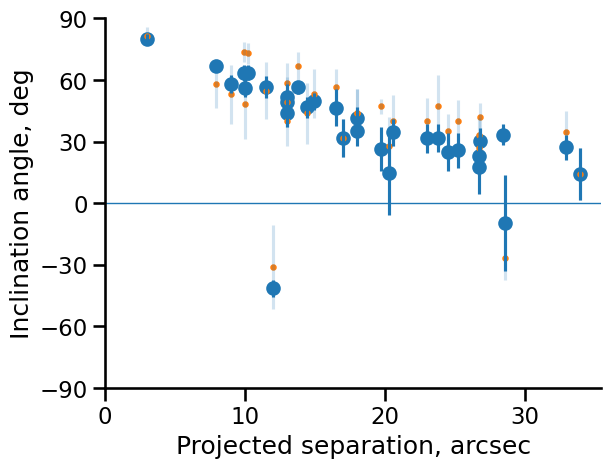

In [24]:
fig, ax = plt.subplots()
x = df["R_proj"]
y = unumpy.nominal_values(df["inc (hubb)"])
dy = unumpy.std_devs(df["inc (hubb)"])
y2 = unumpy.nominal_values(df["inc (const)"])
dy2 = unumpy.std_devs(df["inc (const)"])
ax.scatter(x, y)
ax.errorbar(x, y, yerr=dy, fmt="none")
ax.scatter(x, y2, s=10)
ax.errorbar(x, y2, yerr=dy2, fmt="none", alpha=0.2)
ax.axhline(0.0, lw=1)
ax.set(
    xlabel="Projected separation, arcsec",
    ylabel="Inclination angle, deg",
    xlim=[0, None],
    ylim=[-90, 90],
)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
sns.despine()
fig.savefig("zavala-clump-inclinations.pdf", bbox_inches="tight")
...;

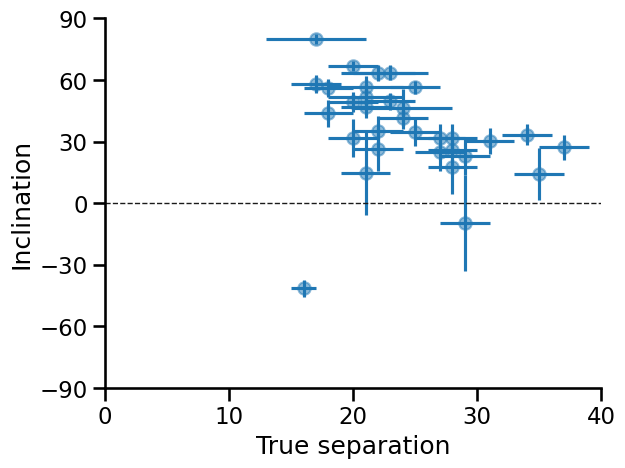

In [37]:
fig, ax = plt.subplots()

x = unumpy.nominal_values(df["R_s (hubb)"])
dx = unumpy.std_devs(df["R_s (hubb)"])
y = unumpy.nominal_values(df["inc (hubb)"])
dy = unumpy.std_devs(df["inc (hubb)"])
ax.errorbar(x, y, xerr=dx, yerr=dy, fmt="none", zorder=-100)
ax.scatter(x, y, alpha=0.5)
ax.axhline(0.0, color="k", lw=1, ls="dashed")
ax.set(
    ylabel="Inclination",
    xlabel="True separation",
    xlim=[0, 40],
    ylim=[-90, 90],
)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
sns.despine()

...;

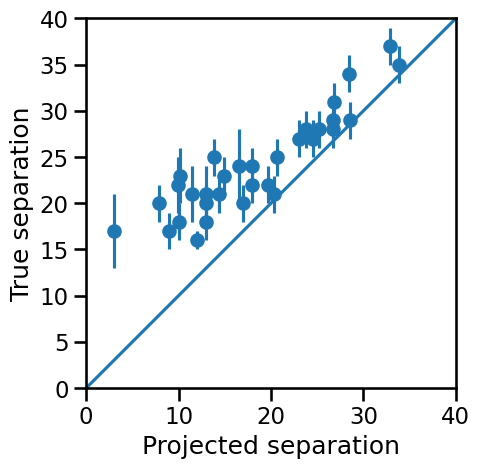

In [21]:
fig, ax = plt.subplots()
x = df["R_proj"]
y = unumpy.nominal_values(df["R_s (hubb)"])
dy = unumpy.std_devs(df["R_s (hubb)"])
ax.scatter(x, y)
ax.errorbar(x, y, yerr=dy, fmt="none")
ax.plot([0, 40], [0, 40], "-")
ax.set(
    xlabel="Projected separation",
    ylabel="True separation",
    xlim=[0, 40],
    ylim=[0, 40],
)
ax.set_aspect("equal")
...;

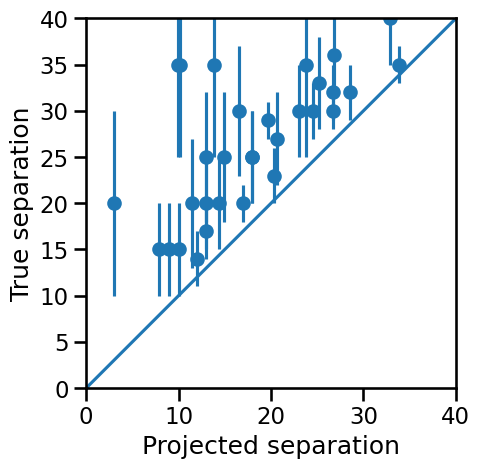

In [22]:
fig, ax = plt.subplots()
x = df["R_proj"]
y = unumpy.nominal_values(df["R_s (const)"])
dy = unumpy.std_devs(df["R_s (const)"])
ax.scatter(x, y)
ax.errorbar(x, y, yerr=dy, fmt="none")
ax.plot([0, 40], [0, 40], "-")
ax.set(
    xlabel="Projected separation",
    ylabel="True separation",
    xlim=[0, 40],
    ylim=[0, 40],
)
ax.set_aspect("equal")
...;